In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cybersecurity_attacks.csv')

In [3]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

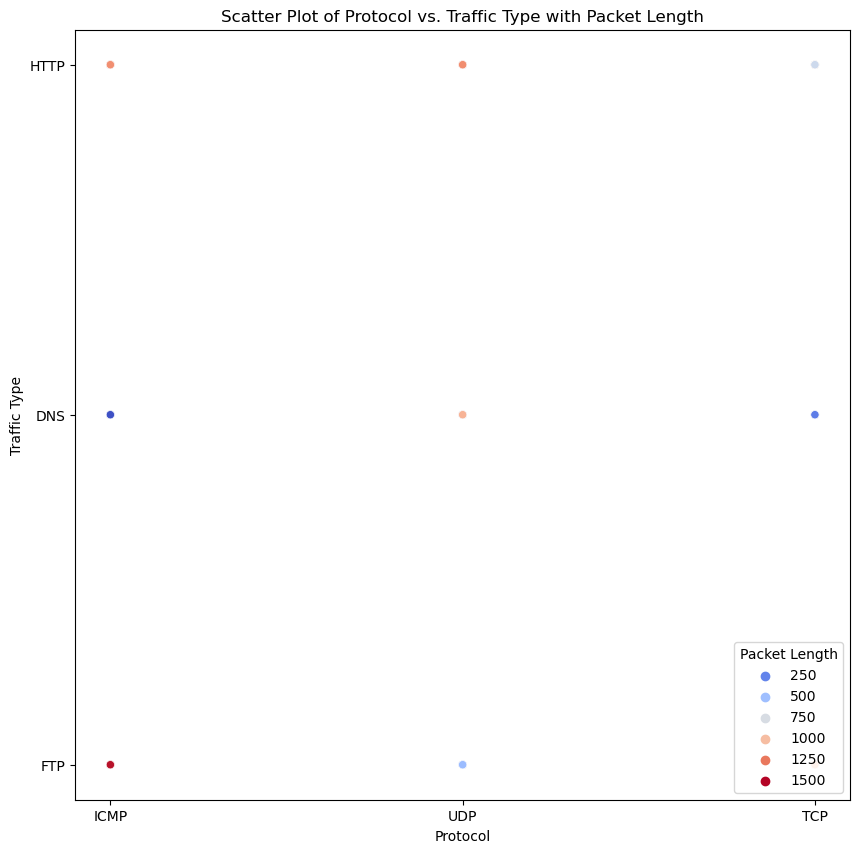

In [5]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Protocol', y='Traffic Type', hue='Packet Length', palette='coolwarm')
plt.title('Scatter Plot of Protocol vs. Traffic Type with Packet Length')
plt.xlabel('Protocol')
plt.ylabel('Traffic Type')


#plt.legend(title='Packet Length')
plt.show()

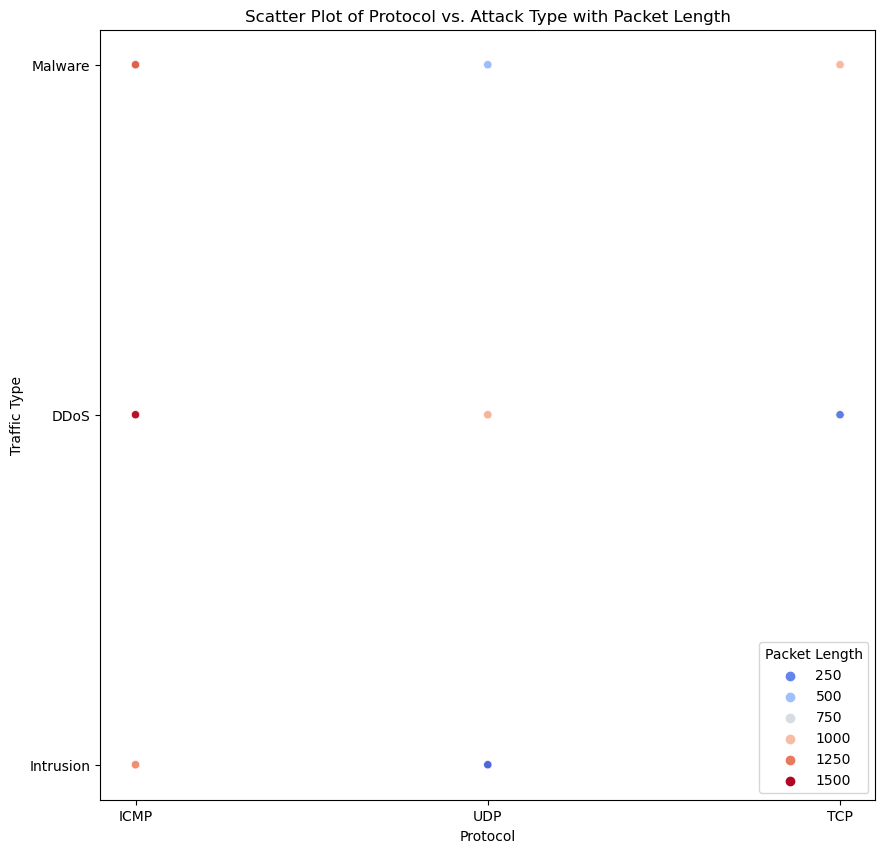

In [6]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Protocol', y='Attack Type', hue='Packet Length', palette='coolwarm')
plt.title('Scatter Plot of Protocol vs. Attack Type with Packet Length')
plt.xlabel('Protocol')
plt.ylabel('Traffic Type')


#plt.legend(title='Packet Length')
plt.show()

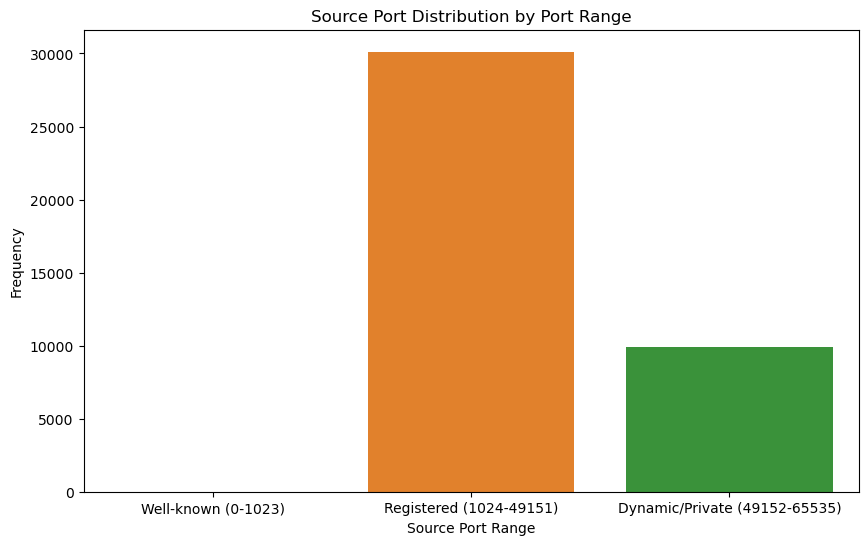

In [7]:
# Create a column for port ranges
def categorize_port(port):
    if port <= 1023:
        return 'Well-known (0-1023)'
    elif port <= 49151:
        return 'Registered (1024-49151)'
    else:
        return 'Dynamic/Private (49152-65535)'

df['Source Port Range'] = df['Source Port'].apply(categorize_port)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Source Port Range', order=['Well-known (0-1023)', 'Registered (1024-49151)', 'Dynamic/Private (49152-65535)'])
plt.title('Source Port Distribution by Port Range')
plt.xlabel('Source Port Range')
plt.ylabel('Frequency')
plt.show()

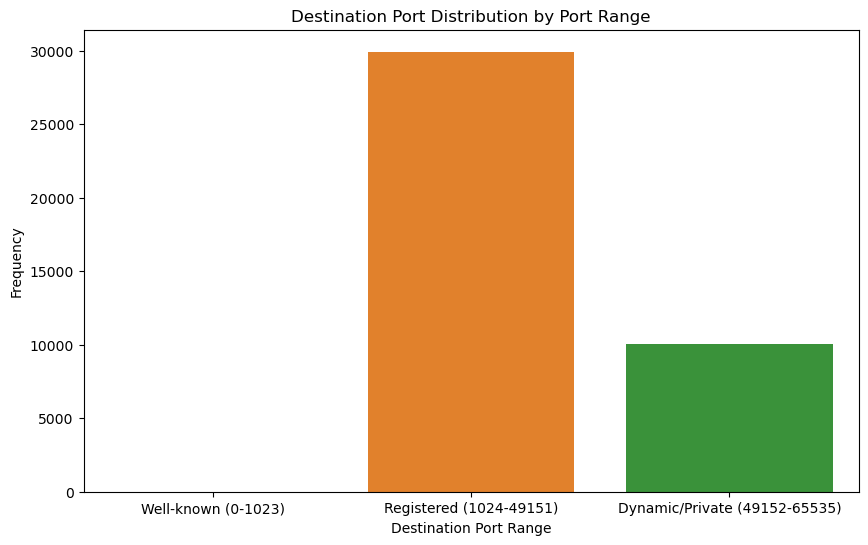

In [20]:
df['Destination Port Range'] = df['Destination Port'].apply(categorize_port)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Destination Port Range', order=['Well-known (0-1023)', 'Registered (1024-49151)', 'Dynamic/Private (49152-65535)'])
plt.title('Destination Port Distribution by Port Range')
plt.xlabel('Destination Port Range')
plt.ylabel('Frequency')
plt.show()

C:\Users\dansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


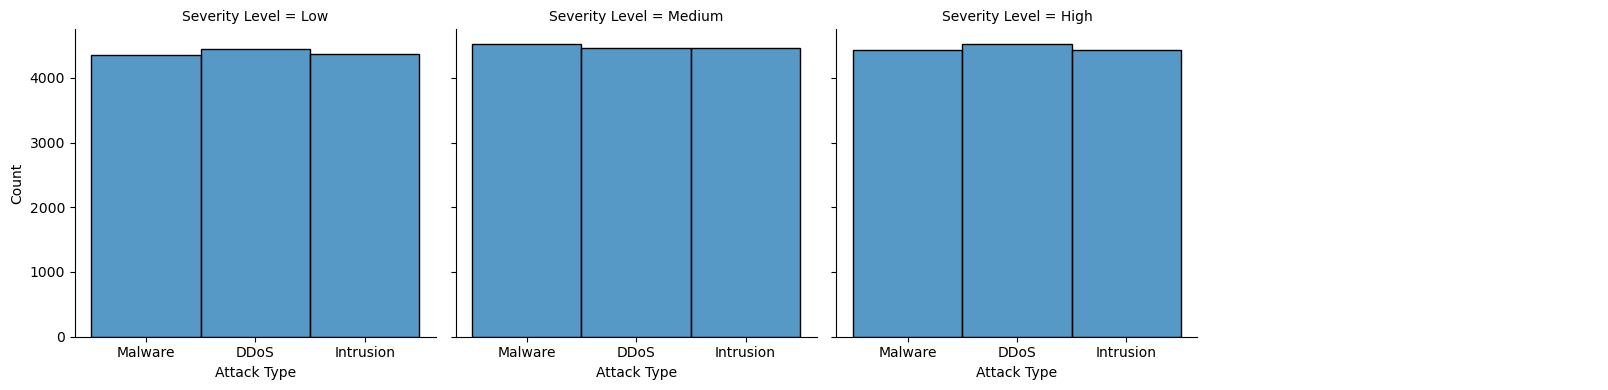

In [18]:
g = sns.FacetGrid(df, col='Severity Level', col_wrap=4, height=4)
g.map(sns.histplot, 'Attack Type')
g.add_legend()
plt.show()